In [1]:
# unsupervised ml technique to cluster data points
# finds patterns in data
# it is iterative ie. it will converge too optimal clustering over time

STEPS


In [2]:
# specify the number of clusters (denoted as K)
# randomly initialize the centroid for each cluster
# determine which data points belong to which cluster by finding the closest centroid
# update centroid based on geometric mean (gives central tendency of data points) of all data points in the cluster
# run the above 2 processes until centroids stop changing

IMPORTS

In [47]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA # to convert 5 d data to 2d and graph clusters
import matplotlib.pyplot as plt
from IPython.display import clear_output

READ DATA

In [5]:
players = pd.read_csv('players_22.csv')

In [6]:
players

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5767,213694,https://sofifa.com/player/213694/kenji-gorre/2...,K. Gorré,Kenji Joel Gorré,LW,69,70,1600000.0,8000.0,26,...,44+2,44+2,44+2,52+2,18+2,https://cdn.sofifa.net/players/213/694/22_120.png,https://cdn.sofifa.net/teams/1898/60.png,https://cdn.sofifa.net/flags/pt.png,NaN,https://cdn.sofifa.net/flags/cw.png
5768,213699,https://sofifa.com/player/213699/ashley-fletch...,A. Fletcher,Ashley Fletcher,ST,69,73,2000000.0,24000.0,25,...,45+2,45+2,45+2,44+2,16+2,https://cdn.sofifa.net/players/213/699/22_120.png,https://cdn.sofifa.net/teams/1795/60.png,https://cdn.sofifa.net/flags/gb-eng.png,NaN,https://cdn.sofifa.net/flags/gb-eng.png
5769,213905,https://sofifa.com/player/213905/sam-gallagher...,S. Gallagher,Sam Gallagher,"ST, LW, RW",69,71,1800000.0,20000.0,25,...,55+2,55+2,55+2,56+2,17+2,https://cdn.sofifa.net/players/213/905/22_120.png,https://cdn.sofifa.net/teams/3/60.png,https://cdn.sofifa.net/flags/gb-eng.png,NaN,https://cdn.sofifa.net/flags/gb-eng.png
5770,213948,https://sofifa.com/player/213948/duane-holmes/...,D. Holmes,Duane Holmes,"RW, LW, CM",69,69,1500000.0,6000.0,26,...,54+2,54+2,54+2,62+2,16+2,https://cdn.sofifa.net/players/213/948/22_120.png,https://cdn.sofifa.net/teams/1939/60.png,https://cdn.sofifa.net/flags/gb-eng.png,NaN,https://cdn.sofifa.net/flags/us.png


In [9]:
features = ['overall', 'potential', "wage_eur", "value_eur", "age"]

In [10]:
players = players.dropna(subset=features)

In [12]:
data = players[features].copy()

In [13]:
data.head()

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30


STEPS TO KMEANS

1. scale the data - values with larger values will tend to hold more weightage - hence to avoid it
2. initialize random cetroids
3. label each data point
4. update centroids
5. repeat steps 3 & 4 until centroids stop changing

In [17]:
# min max scaling - no one column dominates the other

data = (data - data.min()) / (data.max() - data.min()) * 9 + 1

In [18]:
data.describe()

,overall,potential,wage_eur,value_eur,age
count,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000
mean,2.775545,3.412092,1.601969,1.344831,4.668929
std,1.428598,1.665664,0.786866,0.588997,1.433230
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.750000,2.038462,1.193133,1.081248,3.769231
50%,2.500000,3.076923,1.373391,1.146247,4.807692
75%,3.625000,4.461538,1.708155,1.318029,5.500000
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [19]:
data.head()

,overall,potential,wage_eur,value_eur,age
0,10.000,9.307692,9.227468,4.614393,6.884615
1,9.625,8.961538,7.939914,6.541140,6.192308
2,9.250,8.615385,7.939914,3.082280,7.576923
3,9.250,8.615385,7.939914,6.982203,5.153846
4,9.250,8.615385,10.000000,6.819706,5.500000


In [21]:
# initialize random centroid for each feature

centroids = []

centroid = data.apply(lambda x: float(x.sample()))
# randomly samples a single value from each column
centroid

overall      3.625000
potential    4.461538
wage_eur     2.042918
value_eur    1.085891
age          2.038462
dtype: float64

In [24]:
# now for k clusters we need k centroids for each column

def random_centroids(data, k):
  for i in range(k):
    centroid = data.apply(lambda x: float(x.sample()))
    centroids.append(centroid)
  return pd.concat(centroids, axis=1)

In [25]:
centroids = random_centroids(data, 5)

In [26]:
centroids

,0,1,2,3,4
overall,2.875000,3.250000,2.875000,4.000000,3.250000
potential,2.730769,2.384615,4.115385,3.076923,4.461538
wage_eur,1.296137,1.003863,1.218884,1.579399,1.347639
value_eur,1.341243,1.188032,1.067320,1.215889,1.160175
age,2.384615,4.461538,5.500000,5.846154,3.423077


In [29]:
# label each data point
# for each data point ex messi find eucledian dist between data point and cluster center
# centroid that is closest and assign to that cluster


distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))

In [31]:
distances # represents the distance of messi with cluster 0, 1, ....

,0,1,2,3,4
0,13.707336,13.369010,12.504478,12.080715,12.452039
1,13.040790,12.792837,12.027549,11.627708,11.873168
2,12.222944,11.671551,10.697502,10.255349,10.847186
3,12.605481,12.529286,11.881436,11.507514,11.558723
4,13.811073,13.731246,13.080083,12.675416,12.824261
...,...,...,...,...,...
5767,2.917874,2.512194,3.619681,3.893892,3.908952
5768,2.390251,2.431824,3.107458,3.716243,3.093180
5769,2.573647,2.506348,3.530271,3.905911,3.589125
5770,3.099713,2.670988,3.891580,4.065008,4.192372


In [32]:
# now figure out which cluster people are in

distances.idxmin(axis=1)

0       3
1       3
2       3
3       3
4       3
       ..
5767    1
5768    0
5769    1
5770    1
5771    1
Length: 5735, dtype: int64

In [36]:
# now wrap it in a function

def get_labels(data, centroids):
  distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
  return distances.idxmin(axis=1)

In [37]:
labels = get_labels(data, centroids)

In [40]:
labels.value_counts()

1    2257
4    1760
3    1364
0     296
2      58
dtype: int64

In [45]:
# update the centroids based on cluster participants
# use gm -> mean of center of points in eucledian space - nth root of x1*...xn
# for each label group the new centroids (based on data points in that centroid)
# are found and the data frmae is transformed to resembel centroids

data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

,0,1,2,3,4
overall,1.603465,1.788906,3.297408,3.402293,3.072884
potential,2.981796,1.912399,3.778056,3.229094,5.054325
wage_eur,1.248264,1.278057,1.431792,1.696305,1.704519
value_eur,1.116323,1.094371,1.266912,1.325067,1.545804
age,3.041794,4.949992,4.823503,6.195490,3.154194


In [46]:
# change to a function

def new_centroids(data, labels, k):
  return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

PLOT

In [55]:
def plot_clusters(data, labels, centroids, iteration):
  pca = PCA(n_components=2)
  data_2d = pca.fit_transform(data)
  centroids_2d = pca.transform(centroids.T) # as pca model expects data to be cols = fetaures and rows are data ponts
  clear_output(wait=True)
  plt.title(f'Iteration {iteration}')
  plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
  plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
  plt.show()



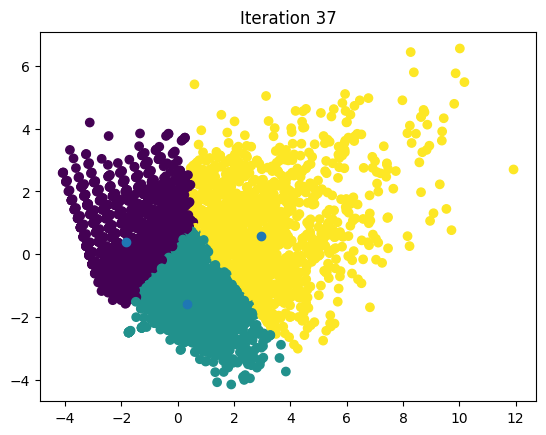

In [57]:
max_iterations = 100
k = 3
centroids = []
centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
  old_centroids = centroids

  labels = get_labels(data, centroids)
  centroids = new_centroids(data, labels, k)
  plot_clusters(data, labels, centroids, iteration)
  iteration += 1

In [59]:
centroids

,0,1,2
overall,1.962846,2.191571,4.816473
potential,1.979875,3.849356,5.416497
wage_eur,1.306669,1.380683,2.247752
value_eur,1.092140,1.205649,1.961486
age,5.522220,3.233022,4.225155


NOW USING K-MEANS

In [60]:
players[labels==2] [['short_name'] + features]

,short_name,overall,potential,wage_eur,value_eur,age
0,L. Messi,93,93,320000.0,78000000.0,34
1,R. Lewandowski,92,92,270000.0,119500000.0,32
2,Cristiano Ronaldo,91,91,270000.0,45000000.0,36
3,Neymar Jr,91,91,270000.0,129000000.0,29
4,K. De Bruyne,91,91,350000.0,125500000.0,30
...,...,...,...,...,...,...
1962,J. Musiala,75,88,19000.0,13000000.0,18
1964,Mingueza,75,83,76000.0,12000000.0,22
2336,J. Tanganga,74,84,49000.0,9000000.0,22
2386,A. Lunin,74,85,59000.0,8000000.0,22


In [58]:
from sklearn.cluster import KMeans

kmeans = KMeans(3)
kmeans.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [61]:
pd.DataFrame(kmeans.cluster_centers_, columns=features).T

,0,1,2
overall,5.462455,2.141713,2.607643
potential,5.771064,2.183837,4.398083
wage_eur,2.787640,1.340088,1.497822
value_eur,2.343024,1.102522,1.293995
age,4.742092,5.482433,3.262729


In [65]:
players[labels==2] [['short_name'] + features]

,short_name,overall,potential,wage_eur,value_eur,age
0,L. Messi,93,93,320000.0,78000000.0,34
1,R. Lewandowski,92,92,270000.0,119500000.0,32
2,Cristiano Ronaldo,91,91,270000.0,45000000.0,36
3,Neymar Jr,91,91,270000.0,129000000.0,29
4,K. De Bruyne,91,91,350000.0,125500000.0,30
...,...,...,...,...,...,...
1962,J. Musiala,75,88,19000.0,13000000.0,18
1964,Mingueza,75,83,76000.0,12000000.0,22
2336,J. Tanganga,74,84,49000.0,9000000.0,22
2386,A. Lunin,74,85,59000.0,8000000.0,22
